# Supervised Learning → Logistic Regression (Classification)
This notebook is part of the **ML-Methods** project.

The first sections focus on data preparation
and are intentionally repeated.

This allows each notebook to be read independently
and makes model comparisons clearer.

1. Project setup and common pipeline
2. Dataset loading
3. Train-test split
4. Feature scaling (why we do it)

----------------------------------

5. What is this model? (Intuition)
6. Model training
7. Model behavior and key parameters
8. Predictions
9. Model evaluation
10. When to use it and when not to
11. Model persistence
12. Mathematical formulation (deep dive)

-----------------------------------------------------

## How this notebook should be read

This notebook is designed to be read **top to bottom**.

Before every code cell, you will find a short explanation describing:
- what we are about to do
- why this step is necessary
- how it fits into the overall process

The goal is not just to run the code,
but to understand what is happening at each step
and be able to adapt it to your own data.

-----------------------------------------------------

## What is Logistic Regression?

Logistic Regression is a **classification model**,
even though its name contains the word “regression”.

Instead of predicting a continuous value,
Logistic Regression predicts the **probability**
that an input belongs to a given class.

-----------------------------------------------------

## Why we start with intuition

Logistic Regression looks similar to Linear Regression,
but it behaves very differently.

Understanding this difference early
helps avoid confusion when reading the code
and interpreting the results.

-----------------------------------------------------

## What you should expect from the results

With Logistic Regression, you should expect:
- probabilistic outputs
- linear decision boundaries
- strong performance on linearly separable data

It is often used as:
- a baseline classification model
- a simple and interpretable solution
- a reference point for more complex classifiers



____________________________________________________

## 1. Project setup and common pipeline

In this section we set up the common pipeline
used across classification models in this project.

Although the pipeline is similar to regression,
the evaluation and interpretation steps will differ.


In [1]:
# Common imports used across all classification models

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

import joblib


# ____________________________________
## 2. Dataset loading

In this section we load the dataset
used for the Logistic Regression classification task.

We use a binary classification dataset
to clearly illustrate how the model works.


In [2]:
# Load the dataset

data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target


### Inputs and target

- `X` contains the input features
- `y` contains the target labels

In this dataset:
- the task is binary classification
- the target takes two possible values (0 or 1)


### Why this dataset is suitable

This dataset is well suited for Logistic Regression because:
- it is clean and well-structured
- the classes are reasonably separable
- it is commonly used as a reference for classification models

This makes it ideal for understanding
both the strengths and limitations of Logistic Regression.


# ____________________________________
## 3. Train-test split

In this section we split the dataset
into training and test sets.

This step is essential to evaluate
how well the classification model generalizes
to unseen data.


In [3]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


### Why this step is important

A classification model should be evaluated
on data it has never seen before.

By separating the data:
- the training set is used to learn decision boundaries
- the test set is used only for evaluation

This prevents overly optimistic results
and reflects real-world performance.


### Consistency across notebooks

We use the same split strategy
as in other ML-Methods notebooks.

This keeps the pipeline consistent
and makes comparisons across models easier.

### Note on train-test split proportions

The choice of train-test split proportions
depends on the specific problem and dataset.

Common splits include:
- 80 / 20
- 70 / 30
- 90 / 10

In this notebook, we use an 80 / 20 split
as a reasonable default.

In practice:
- smaller datasets may benefit from more training data
- larger datasets allow for larger test sets
- cross-validation is often used for more robust evaluation


# ____________________________________
## 4. Feature scaling (why we do it)

In this section we apply feature scaling
to the input features.

Feature scaling is **very important** for Logistic Regression
and directly affects how the model learns.


### Why scaling matters for Logistic Regression

Logistic Regression is an optimization-based model.

This means:
- the model learns parameters by minimizing a loss function
- gradient-based optimization is used

If features have very different scales:
- optimization becomes slower
- some features may dominate others
- convergence may be unstable


### What scaling does

Feature scaling:
- centers features around zero
- puts them on a comparable scale
- improves numerical stability

This helps the model:
- learn faster
- converge more reliably
- produce more stable coefficients


### Important rule: fit only on training data

As with all preprocessing steps:
- the scaler is fitted on training data only
- the same scaler is applied to test data

This prevents data leakage
and ensures a fair evaluation.


In [4]:
# Feature scaling

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### What we have after this step

- scaled training data
- scaled test data
- a clean and stable input space for Logistic Regression

At this point, the data is ready
to be used by the classification model.


# ____________________________________
## 5. What is this model? (Logistic Regression)

Before training the model, it is important to understand
what Logistic Regression does conceptually.

Despite its name, Logistic Regression is **not a regression model**.
It is a **classification model**.


### The core idea

Logistic Regression predicts **probabilities**, not class labels.

Given an input sample, the model computes:
- a score based on a linear combination of the features
- transforms this score into a probability between 0 and 1

This probability represents:
- how likely the sample belongs to a given class


### From probability to class

To make a final classification decision:
- a threshold is applied (usually 0.5)
- probabilities above the threshold are assigned to class 1
- probabilities below the threshold are assigned to class 0

This simple rule converts probabilities
into discrete class predictions.


### How this differs from Linear Regression

Linear Regression:
- predicts continuous values
- has no concept of probability
- is not suitable for classification

Logistic Regression:
- predicts probabilities
- is designed for classification
- produces a decision boundary between classes


### Why the sigmoid function matters

Logistic Regression uses a **sigmoid function**
to map any real-valued number
into a value between 0 and 1.

This ensures that:
- predictions can be interpreted as probabilities
- extreme values are smoothly compressed
- the model remains stable during training


### Key takeaway

Logistic Regression answers the question:
"What is the probability that this sample belongs to class 1?"

By combining a linear model with a probability function,
it provides a simple, interpretable, and effective
approach to binary classification.


# ____________________________________
## 6. Model training (Logistic Regression)

In this section we train the Logistic Regression model.

Training Logistic Regression means learning
a linear decision boundary that separates the classes
by optimizing a probabilistic loss function.


### What does "training" mean for Logistic Regression?

During training, the model:
- computes predicted probabilities
- compares them with the true class labels
- updates its parameters to reduce the prediction error

This process is performed using
gradient-based optimization.


### Important parameters (kept simple)

For this first example, we use a basic configuration.

The goal is to understand how the model works,
not to optimize its performance.


In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

# Train the model
log_reg_model.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

### What these parameters mean

- `max_iter=1000`  
  Maximum number of optimization iterations.  
  Increased to ensure convergence after feature scaling.

- `random_state=42`  
  Ensures reproducibility of results.


Note:
The `max_iter` parameter does not affect model complexity.
It only ensures that the optimization process
has enough iterations to converge.


### What we have after training

After this step:
- the model has learned a decision boundary
- coefficients define how features influence the prediction
- the model is ready to output probabilities and class labels


# ____________________________________
## 7. Model behavior and key parameters (Logistic Regression)

In this section we analyze how Logistic Regression behaves
and which parameters influence its predictions.

Unlike regression models,
Logistic Regression produces probabilities
and class decisions.


### Coefficients and feature influence

Logistic Regression learns one coefficient per feature.

Each coefficient represents:
- the strength of the feature
- the direction of its influence on the predicted probability

Positive coefficients:
- increase the probability of class 1

Negative coefficients:
- decrease the probability of class 1


### Decision boundary

Logistic Regression creates a **linear decision boundary**.

This boundary separates:
- samples predicted as class 0
- samples predicted as class 1

Even though the output is probabilistic,
the boundary itself is linear in the feature space.


### Probability vs class prediction

The model internally works with probabilities.

To produce class labels:
- a threshold is applied (usually 0.5)
- probabilities above the threshold → class 1
- probabilities below the threshold → class 0

Changing this threshold changes:
- the balance between false positives and false negatives in te confusion matrix. We will see that soon.


### Key takeaway

Logistic Regression:
- models probabilities, not just labels
- uses a linear decision boundary
- is highly interpretable

To properly evaluate its performance,
we need more than a single metric.

This is why, in the evaluation step,
we will use a **confusion matrix**
to understand different types of errors.


# ____________________________________
## 8. Predictions (Logistic Regression)

In this section we use the trained Logistic Regression model
to generate predictions on unseen data.

For classification models,
it is important to distinguish between:
- predicted probabilities
- predicted class labels


### Predicting class labels

The `predict` method returns the final class prediction.

These predictions are obtained by:
- computing probabilities internally
- applying a decision threshold (default = 0.5)


In [7]:
# Predict class labels on the test set

y_pred = log_reg_model.predict(X_test_scaled)
print(y_pred)


[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]


### Predicting probabilities

The `predict_proba` method returns class probabilities.

For each sample, it outputs:
- the probability of class 0
- the probability of class 1

These probabilities provide more information
than class labels alone.


In [14]:
# Predict class probabilities on the test set

y_pred_proba = log_reg_model.predict_proba(X_test_scaled)

pd.DataFrame(
    y_pred_proba[:10],
    columns=["P(class 0)", "P(class 1)"]
)



,P(class 0),P(class 1)
0,0.113590,8.864098e-01
1,0.999991,9.009362e-06
2,0.996921,3.079095e-03
3,0.000510,9.994899e-01
4,0.000061,9.999394e-01
5,1.000000,9.480878e-11
6,1.000000,1.536726e-09
7,0.965097,3.490306e-02
8,0.379342,6.206579e-01
9,0.000759,9.992406e-01


### How probabilities are used

Probabilities allow us to:
- understand model confidence
- adjust the classification threshold
- analyze different types of errors

In this notebook:
- we use the default threshold (0.5)
- probabilities are used for interpretation,
  not for threshold tuning


### What you should expect to see

With Logistic Regression, you should expect:
- confident predictions for well-separated samples
- probabilities closer to 0.5 near the decision boundary
- stable and interpretable behavior

These predictions will be evaluated in the next section
using appropriate classification metrics.


# ____________________________________
## 9. Model evaluation (Logistic Regression)

In this section we evaluate the performance of the Logistic Regression model
on unseen test data.

For classification problems, evaluation is not limited
to a single metric.
We need to understand **what type of errors** the model makes.


### Accuracy

Accuracy measures the proportion of correct predictions.

It answers the question:
"How often is the model correct?"

While useful, accuracy alone can be misleading,
especially when classes are imbalanced.


In [16]:
# Compute accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy :{accuracy}")


accuracy :0.9736842105263158


### Confusion matrix

The confusion matrix provides a detailed breakdown
of prediction results.

It shows:
- correct predictions
- false positives
- false negatives

This allows us to understand *how* the model is making mistakes,
not just how many.


In [17]:
# Compute confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[41,  2],
       [ 1, 70]])

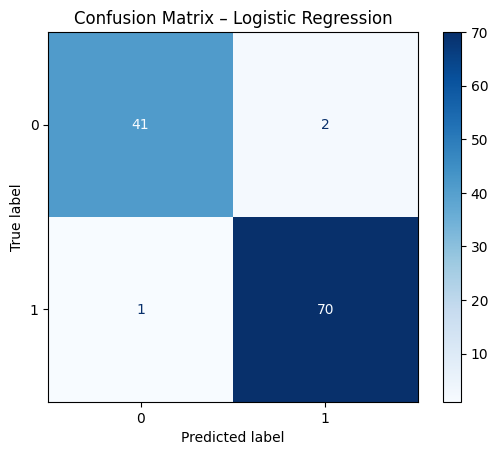

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=log_reg_model.classes_
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


### About the confusion matrix

The confusion matrix provides a detailed view
of how a classification model makes predictions.

In this notebook, we focus on **how to read the results**
and what they tell us about model behavior.

For a deeper explanation of:
- each cell of the matrix
- common pitfalls
- real-world examples

please refer to the dedicated **Confusion Matrix** page
in the general concepts section of this project.


### How to read the confusion matrix

For a binary classification problem:

- True Negatives (top-left):
  correctly predicted class 0

- False Positives (top-right):
  predicted class 1, but true class is 0

- False Negatives (bottom-left):
  predicted class 0, but true class is 1

- True Positives (bottom-right):
  correctly predicted class 1

Each cell tells us a different story
about model behavior.


### Classification report

The classification report summarizes key metrics
for each class:

- Precision
- Recall
- F1-score

These metrics are especially important
when the cost of different errors is not the same.


In [18]:
# Classification report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### What you should focus on

When evaluating Logistic Regression:

- Accuracy gives a high-level overview
- Confusion matrix shows error types
- Precision and recall explain trade-offs

There is no single “best” metric.
The right focus depends on the problem context.


### Key takeaway

Logistic Regression evaluation is about understanding errors,
not just counting correct predictions.

The confusion matrix is the most informative tool
to analyze classification performance
and should always be examined.
